In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as ndates

from pandas_datareader import data as web # Read info from online
import warnings
warnings.filterwarnings('ignore')

import html5lib


import cufflinks as cf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

import yfinance as yf

# Import python technical analysis library
from ta.trend import MACD
from ta.momentum import StochasticOscillator

In [2]:
# Download tesla stock data
udmy = yf.download(tickers = 'UDMY', period = '1y', interval = '1d')
udmy

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-29,27.000000,27.740000,26.010000,27.500000,27.500000,7601900
2021-11-01,28.000000,29.690001,26.110001,29.219999,29.219999,2189400
2021-11-02,29.219999,29.590000,27.705000,29.459999,29.459999,1371000
2021-11-03,29.590000,29.990000,27.129999,28.600000,28.600000,1338900
2021-11-04,28.980000,29.030001,27.219999,27.379999,27.379999,2029700
...,...,...,...,...,...,...
2022-05-31,15.690000,15.960000,14.360000,14.750000,14.750000,1177100
2022-06-01,14.590000,14.920000,13.370000,13.450000,13.450000,1331000
2022-06-02,13.390000,14.210000,13.070000,14.000000,14.000000,1407000


In [3]:
x = udmy.index
close = udmy['Adj Close']
high = udmy['High']
low = udmy['Low']
openp = udmy['Open']

# Making a new column
#This tells us we are doing a mean price for every 5 days
udmy['MA5'] = udmy['Adj Close'].rolling(5).mean()
udmy['MA20'] = udmy['Adj Close'].rolling(20).mean()
udmy

,Open,High,Low,Close,Adj Close,Volume,MA5,MA20
Date,,,,,,,,
2021-10-29,27.000000,27.740000,26.010000,27.500000,27.500000,7601900,NaN,NaN
2021-11-01,28.000000,29.690001,26.110001,29.219999,29.219999,2189400,NaN,NaN
2021-11-02,29.219999,29.590000,27.705000,29.459999,29.459999,1371000,NaN,NaN
2021-11-03,29.590000,29.990000,27.129999,28.600000,28.600000,1338900,NaN,NaN
2021-11-04,28.980000,29.030001,27.219999,27.379999,27.379999,2029700,28.432,NaN
...,...,...,...,...,...,...,...,...
2022-05-31,15.690000,15.960000,14.360000,14.750000,14.750000,1177100,14.660,12.408
2022-06-01,14.590000,14.920000,13.370000,13.450000,13.450000,1331000,14.756,12.569
2022-06-02,13.390000,14.210000,13.070000,14.000000,14.000000,1407000,14.772,12.763


<AxesSubplot:title={'center':'5day moving average'}, xlabel='Date'>

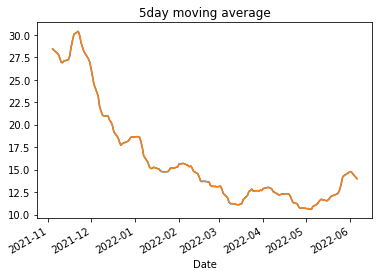

In [10]:
udmy_ma5 = udmy['Adj Close'].rolling(window = 5).mean()
udmy_ma5.plot(title = '5day moving average')
udmy_ma5.plot()


<AxesSubplot:title={'center':'20day moving average'}, xlabel='Date'>

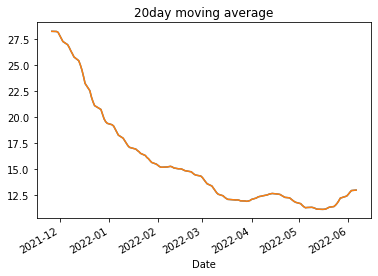

In [11]:
udmy_ma20 = udmy['Adj Close'].rolling(window = 20).mean()
udmy_ma20.plot(title = '20day moving average')
udmy_ma20.plot()

In [12]:
# Plot UDEMY stock price data with moving averages
# Calculates 5 and 20 day moving average
# Takes prices and divides them by a defined time period
# Short periods react quickly, while longer react slower to price changes
# They are used to see if a stock is in an uptrend

# 5day moving average
ma5 = go.Scatter(x = udmy.index, y = udmy_ma5, line = dict(color = 'red',
                                                                 width = 1), name = 'MA5')
# 20day moving average
ma20 = go.Scatter(x = udmy.index, y = udmy_ma20, line = dict(color = 'green',
                                                                 width = 1), name = 'MA20')

# Plotting the price
udmy_prc = go.Scatter(x = udmy.index, y = udmy['Adj Close'], line = dict(color = 'blue',
                                                                 width = 1), name = 'Price')

fig = go.Figure()
fig.add_trace(ma5)
fig.add_trace(ma20)
fig.add_trace(udmy_prc)
fig.update_xaxes(rangeslider_visible = True, title = 'Zoom on dates using slider')
fig.update_layout(title = 'UDEMY Simple Moving Average')
fig.update_yaxes(title = 'Stock price')
fig.show()

A SMA allows you to see the big picture when analyzing a stock. It however takes time to catch up to current trends. 


In [13]:
# Exponential moving average
udmy['ema5'] = udmy['Adj Close'].ewm(span = 5, adjust = False).mean()
udmy['ema20'] = udmy['Adj Close'].ewm(span = 20, adjust = False).mean()
udmy

,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,ema5,ema20
Date,,,,,,,,,,
2021-10-29,27.000000,27.740000,26.010000,27.500000,27.500000,7601900,NaN,NaN,27.500000,27.500000
2021-11-01,28.000000,29.690001,26.110001,29.219999,29.219999,2189400,NaN,NaN,28.073333,27.663809
2021-11-02,29.219999,29.590000,27.705000,29.459999,29.459999,1371000,NaN,NaN,28.535555,27.834875
2021-11-03,29.590000,29.990000,27.129999,28.600000,28.600000,1338900,NaN,NaN,28.557037,27.907744
2021-11-04,28.980000,29.030001,27.219999,27.379999,27.379999,2029700,28.432,NaN,28.164691,27.857483
...,...,...,...,...,...,...,...,...,...,...
2022-05-31,15.690000,15.960000,14.360000,14.750000,14.750000,1177100,14.660,12.408,14.655945,12.964819
2022-06-01,14.590000,14.920000,13.370000,13.450000,13.450000,1331000,14.756,12.569,14.253963,13.011027
2022-06-02,13.390000,14.210000,13.070000,14.000000,14.000000,1407000,14.772,12.763,14.169309,13.105215


In [14]:
# Exponential moving average
# EMA can be used to reduce the lag by putting more emphasis on recent price data
fig = go.Figure()
candle = go.Candlestick(x = udmy.index, open = udmy['Open'], 
                       high = udmy['High'],
                       low = udmy['Low'],
                       close = udmy['Close'],
                       name = 'Candlestick')
ema5 = go.Scatter(x = udmy.index, y = udmy['ema5'],
                  line = dict(color = 'green', width = 1), name = 'EMA5')
ema20 = go.Scatter(x = udmy.index, y = udmy['ema20'],
                  line = dict(color = 'orange', width = 1), name = 'EMA20')


fig.add_trace(candle)
fig.add_trace(ema5)
fig.add_trace(ema20)
fig.update_layout(title = 'UDEMY Exponential Moving Average')
fig.update_xaxes(rangebreaks = [dict(bounds = ['sat', 'mon'])])
fig.show() 

From the EMA plot above, we see that whenever the 5day moving average breaks across the 20day moving average, thats a sign the stock is in an uptrend and whenever it breaks below the 20 moving average, its a sign of a downward trend.
